In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_units(n):
    temp_n =n
    unit=0
    while temp_n > 9:
        temp_n = round(temp_n/10)
        unit= unit+1
    return unit

def roundoff(number,digit=1):
    temp_num = number
    temp_num = temp_num/(10**digit)
    temp_num = round(temp_num)
    return temp_num*(10**digit)

def range_it(nm):
    low_price = nm*0.9
    high_price = nm*1.05
    low_price = roundoff(low_price,get_units(low_price)-1)
    high_price = roundoff(high_price,get_units(high_price)-1)
    return low_price,high_price

def instagram_price_v2(followers,eng_rate,story,image,video,reel,carousel):
    eng_num = followers*eng_rate/100
    num_post = story+image+video+reel+carousel
    if followers <= 10000:
        image_rate = 0.197345014 * followers + 0.021796824 * eng_num
        story_rate = image_rate * 0.6
        video_rate = image_rate * 2
        carousel_rate = image_rate * 1.1
        reel_rate = image_rate * 2.8
    if 10000 < followers <= 20000:
        image_rate = (0.18 * followers + 0.0710766 * eng_num)
        story_rate = image_rate * 0.6
        video_rate = image_rate * 2
        carousel_rate = image_rate * 1.1
        reel_rate = image_rate * 2.8
    if 20000 < followers <= 50000:
        image_rate_1 = (0.12311782 * followers + 0.058194255 * eng_num)
        image_rate_2 = (0.18 * followers + 0.0710766 * eng_num)
        if image_rate_2 > image_rate_1:
            image_rate = image_rate_2
        else: 
            image_rate = image_rate_1
        story_rate = image_rate * 0.6
        video_rate = image_rate * 2
        carousel_rate = image_rate * 1.1
        reel_rate = image_rate * 2.8
    if 50000 < followers <= 100000:
        image_rate_1 = (0.079824414 * followers + 0.026718164 * eng_num)
        image_rate_2 = (0.12311782 * followers + 0.058194255 * eng_num)
        if image_rate_2 > image_rate_1:
            image_rate = image_rate_2 
        else:
            image_rate = image_rate_1
        story_rate = image_rate * 0.6
        video_rate = image_rate * 2
        carousel_rate = image_rate * 1.1
        reel_rate = image_rate * 2.8
    if 100000 < followers <=300000:
        image_rate_1 = (0.047244624 * followers + 0.281887032 * eng_num)
        image_rate_2 = (0.079824414 * followers + 0.026718164 * eng_num)
        if image_rate_2 > image_rate_1:
            image_rate = image_rate_2 
        else:
            image_rate = image_rate_1
        story_rate = image_rate * 0.6
        video_rate = image_rate * 2
        carousel_rate = image_rate * 1.1
        reel_rate = image_rate * 2.8
    if 300000 <followers <= 800000 :
        image_rate = (0.0478704299 * followers + 0.25996956 * eng_num)
        story_rate = image_rate * 0.6
        video_rate = image_rate * 2
        carousel_rate = image_rate * 1.1
        reel_rate = image_rate * 2.8
    if 800000 <followers <= 1000000  :
        image_rate = (0.039892025 * followers + 0.2166413 * eng_num)
        story_rate = image_rate * 0.6
        video_rate = image_rate * 2
        carousel_rate = image_rate * 1.1
        reel_rate = image_rate * 2.8
    if 1000000 <followers <= 3000000  :
        image_rate = (0.039892025 * followers + 0.2166413 * eng_num)
        story_rate = image_rate * 0.6
        video_rate = image_rate * 2
        carousel_rate = image_rate * 1.1
        reel_rate = image_rate * 2.8
    if followers > 3000000 :
        image_rate = (0.039892025 * followers + 0.2166413 * eng_num)
        story_rate = image_rate * 0.6
        video_rate = image_rate * 2
        carousel_rate = image_rate * 1.1
        reel_rate = image_rate * 2.8
    if followers <=5000000:
        base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
    if followers>5000000:
        rate_dec = ((followers/1000000)-(5000000/1000000))*7.87272727
        video_rate = 0.24583049*5000000 + 0.01875384*eng_num
        story_rate = video_rate*0.03
        image_rate = video_rate*0.40
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*0.8
        video_rate = video_rate*0.9
        base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
        base_amount = base_amount*(1+rate_dec/100)
    if eng_rate > 2:
        base_amount = base_amount*(100+(1.14055527*eng_rate))/100
    if num_post>=3:
        discount_amount = base_amount*0.75
        return discount_amount
    else:
        return base_amount
    
def instagram_price(followers,eng_rate,story,image,video,reel,carousel):
    eng_num = followers*eng_rate/100
    num_post = story+image+video+reel+carousel
    video_rate = 0.24583049*followers + 0.01875384*eng_num
    if followers <= 10000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
    if 10000 < followers <=50000:
        story_rate = video_rate*0.6
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.35
    if 50000 < followers <=100000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.5
        carousel_rate = video_rate*0.5
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.3
    if 100000 < followers <=300000:
        story_rate = video_rate*0.3
        image_rate = video_rate*0.6
        carousel_rate = video_rate*0.65
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.3
    if 300000 <followers <= 800000 :
        story_rate = video_rate*0.3
        image_rate = video_rate*0.7
        carousel_rate = video_rate*0.75
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.45
    if 800000 <followers <= 1000000  :
        story_rate = video_rate*0.4
        image_rate = video_rate*0.7
        carousel_rate = video_rate*0.75
        reel_rate = video_rate*1.4
        video_rate = video_rate*1.50
    if 1000000 <followers <= 3000000  :
        story_rate = video_rate*0.25
        image_rate = video_rate*0.55
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*1.3
        video_rate = video_rate*1.3
    if followers > 3000000 :
        story_rate = video_rate*0.03
        image_rate = video_rate*0.40
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*0.8
        video_rate = video_rate*0.9
    if followers <=5000000:
        base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
    if followers>5000000:
        rate_dec = ((followers/1000000)-(5000000/1000000))*7.87272727
        video_rate = 0.24583049*5000000 + 0.01875384*eng_num
        story_rate = video_rate*0.03
        image_rate = video_rate*0.40
        carousel_rate = video_rate*0.42
        reel_rate = video_rate*0.8
        video_rate = video_rate*0.9
        base_amount = story_rate*story+image_rate*image+video_rate*video+reel_rate*reel+carousel_rate*carousel
        base_amount = base_amount*(1+rate_dec/100)
    if eng_rate > 2:
        base_amount = base_amount*(100+(1.14055527*eng_rate))/100
    if num_post>=3:
        discount_amount = base_amount*0.75
        return discount_amount
    else:
        return base_amount
def plot(dataframe, xaxis, yaxis, Title = "No Title"):
    '''
    yaxis is array of results
    xaxis is single column
    '''
    plt.figure(figsize=(10,10))
    for y in yaxis:
        plt.plot(dataframe[xaxis].tolist(), dataframe[y].tolist(),label="{} vs {}".format(xaxis,y))
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.title(Title)
    plt.legend()
    plt.grid(True)
    plt.show()

,followers,engagement,Brief_type,story,image,carousel,video,reel,amount,Price_prediction_1,Price_prediction_2_lower_bound,Price_prediction_2_higher_bound
0,1000,1,story & video,1,0,0,1,0,0,320,460,540
1,1000,1,>3 post,2,1,0,1,2,0,NaN,1300,1500
2,1000,10,story & video,1,0,0,1,0,0,359,520,610
3,1000,10,>3 post,2,1,0,1,2,0,NaN,1500,1700
4,11000,1,story & video,1,0,0,1,0,0,5277,4700,5400
...,...,...,...,...,...,...,...,...,...,...,...,...
395,981000,10,>3 post,2,1,0,1,2,0,NaN,450000,520000
396,991000,1,story & video,1,0,0,1,0,0,463227,100000,110000
397,991000,1,>3 post,2,1,0,1,2,0,NaN,280000,320000
398,991000,10,story & video,1,0,0,1,0,0,519602,160000,190000


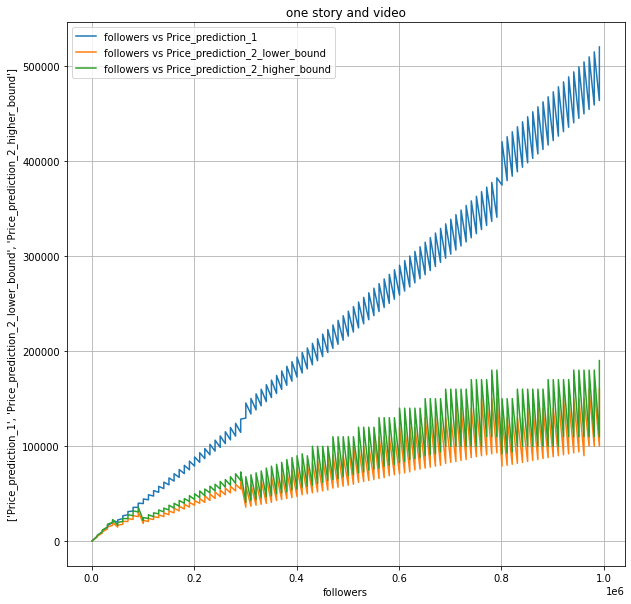

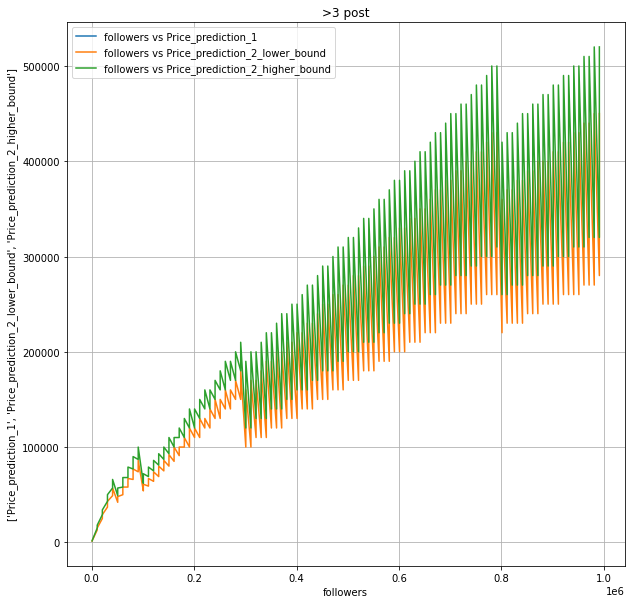

In [5]:
insta_transient = pd.DataFrame(columns =["followers","engagement","Brief_type","story","image","carousel","video","reel","amount","Price_prediction_1","Price_prediction_2_lower_bound","Price_prediction_2_higher_bound"])
for follow in range(1000,1000000,10000):
    for eng in range(1,11,9):
        story,image,carousel,video,reel = 1,0,0,1,0
        amount = 0
        F1,F2 = round(instagram_price(follow,eng,story,image,video,reel,carousel)),round(instagram_price_v2(follow,eng,story,image,video,reel,carousel))
        F2_low,F2_high = range_it(F2)
        push_dict = {"followers":follow,
                     "engagement":eng,
                     "Brief_type":"story & video",
                     "story":story,
                     "image":image,
                     "carousel":carousel,
                     "video":video,
                     "reel":reel,
                     "amount":amount,
                     "Price_prediction_1":F1,
                     "Price_prediction_2_lower_bound":F2_low,
                     "Price_prediction_2_higher_bound":F2_high}
        insta_transient = insta_transient.append(push_dict,ignore_index=True)
        story,image,carousel,video,reel = 2,1,0,1,2
        amount = 0
        F1,F2 = round(instagram_price(follow,eng,story,image,video,reel,carousel)),round(instagram_price_v2(follow,eng,story,image,video,reel,carousel))
        F2_low,F2_high = range_it(F2)
        push_dict = {"followers":follow,
                     "engagement":eng,
                     "Brief_type":">3 post",
                     "story":story,
                     "image":image,
                     "carousel":carousel,
                     "video":video,
                     "reel":reel,
                     "amount":amount,
                     "Price_prediction_2_lower_bound":F2_low,
                     "Price_prediction_2_higher_bound":F2_high}
        insta_transient = insta_transient.append(push_dict,ignore_index=True)
display(insta_transient)
# down_csv = insta_transient[["followers","engagement","Brief_type","story","image","carousel","video","reel","Price_prediction_2_lower_bound","Price_prediction_2_higher_bound"]]
# down_csv.to_csv('Price_version_2_sample.csv')
plot(insta_transient[insta_transient.Brief_type == 'story & video'],'followers',['Price_prediction_1','Price_prediction_2_lower_bound','Price_prediction_2_higher_bound'], "one story and video")
plot(insta_transient[insta_transient.Brief_type == '>3 post'],'followers',['Price_prediction_1','Price_prediction_2_lower_bound','Price_prediction_2_higher_bound'], ">3 post")
# insta_transient['F1 - F2'] = insta_transient.apply(lambda x: x.F1 - x.F2,axis=1)
# insta_transient['eng_num'] = insta_transient.apply(lambda x: (x.followers*x.engagement)/100,axis=1)
# plot(insta_transient, 'followers', ['eng_num'])